# Homework2
## 2020062324 이은비

In [71]:
import numpy as np

## Model

In [72]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size = 2)
        self.b = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

## Training

In [73]:
def train(X, Y, model, lr = 0.1):
    dw = np.array([0.0, 0.0])
    db = 0.0
    m = len(X)
    cost = 0.0
    for x, y in zip(X, Y):
        a = model.predict(x)
        if y == 1:
            cost -= np.log(a) # -y*log{a} - 0 = -1*log{a}
        else:
            cost -= np.log(1-a) # 0 -(1-y)*log{1-a} = -1*log{1-a}
            
        dw += (a-y)*x # dw <- (dL)/(dw)
        db += (a-y) # db <- (dL)/(db)
        
    # Loss합 -> Cost(Loss평균)
    cost /= m
    model.w -= lr * dw/m
    model.b -= lr * db/m
    
    return cost

## Data preparation

In [74]:
X = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0]])
Y_and = np.array([0.0, 0.0, 0.0, 1.0])
Y_or = np.array([0.0, 1.0, 1.0, 1.0])
Y_xor = np.array([0.0, 1.0, 1.0, 0.0])

### AND - Loss plot & Testing(Predicted results)

------ learning rate : 0.01 ------
predicted [0, 0] : [0.00805353]
predicted [0, 1] : [0.1470758]
predicted [1, 0] : [0.14932854]
predicted [1, 1] : [0.78850866]
------ learning rate : 0.1 ------
predicted [0, 0] : [1.24717222e-05]
predicted [0, 1] : [0.02025116]
predicted [1, 0] : [0.02025115]
predicted [1, 1] : [0.97163613]
------ learning rate : 0.5 ------
predicted [0, 0] : [9.35208743e-08]
predicted [0, 1] : [0.00403887]
predicted [1, 0] : [0.00403887]
predicted [1, 1] : [0.99434528]
------ learning rate : 0.9 ------
predicted [0, 0] : [1.57806416e-08]
predicted [0, 1] : [0.00223645]
predicted [1, 0] : [0.00223645]
predicted [1, 1] : [0.99686888]


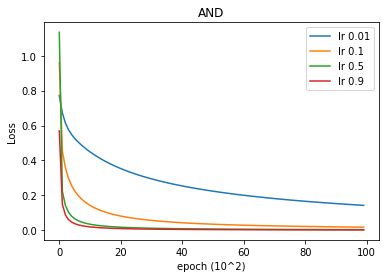

In [75]:
import matplotlib.pyplot as plt

for lr in [0.01, 0.1, 0.5, 0.9]:
    model_and = logistic_regression_model()
    cost_and = []
    for epoch in range(10000):
        cost = train(X, Y_and, model_and, lr)
        if epoch %100 == 0:
            cost_and.append(cost)
    plt.plot(cost_and, label = "lr " + str(lr))
    print('------ learning rate : '+ str(lr) + ' ------')
    print('predicted [0, 0] : ' + str(model_and.predict(np.array([0, 0]))))
    print('predicted [0, 1] : ' + str(model_and.predict(np.array([0, 1]))))
    print('predicted [1, 0] : ' + str(model_and.predict(np.array([1, 0]))))
    print('predicted [1, 1] : ' + str(model_and.predict(np.array([1, 1]))))
plt.title('AND')
plt.ylabel('Loss')
plt.xlabel('epoch (10^2)')
plt.legend(loc='upper right')
plt.show()

### OR - Loss plot & Testing(Predicted results)

------ learning rate : 0.01 ------
predicted [0, 0] : [0.18432744]
predicted [0, 1] : [0.93115395]
predicted [1, 0] : [0.92572248]
predicted [1, 1] : [0.99866117]
------ learning rate : 0.1 ------
predicted [0, 0] : [0.02060545]
predicted [0, 1] : [0.99177473]
predicted [1, 0] : [0.99176611]
predicted [1, 1] : [0.99999855]
------ learning rate : 0.5 ------
predicted [0, 0] : [0.00404285]
predicted [0, 1] : [0.9983833]
predicted [1, 0] : [0.99838331]
predicted [1, 1] : [0.99999999]
------ learning rate : 0.9 ------
predicted [0, 0] : [0.00223473]
predicted [0, 1] : [0.99910624]
predicted [1, 0] : [0.99910624]
predicted [1, 1] : [1.]


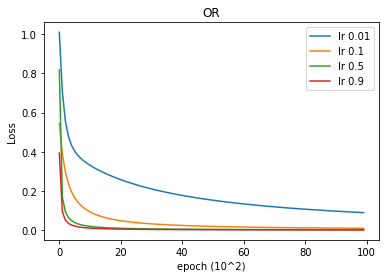

In [76]:
for lr in [0.01, 0.1, 0.5, 0.9]:
    model_or = logistic_regression_model()
    cost_or = []
    for epoch in range(10000):
        cost = train(X, Y_or, model_or, lr)
        if epoch %100 == 0:
            cost_or.append(cost)
    plt.plot(cost_or, label = "lr " + str(lr))
    print('------ learning rate : '+ str(lr) + ' ------')
    print('predicted [0, 0] : ' + str(model_or.predict(np.array([0, 0]))))
    print('predicted [0, 1] : ' + str(model_or.predict(np.array([0, 1]))))
    print('predicted [1, 0] : ' + str(model_or.predict(np.array([1, 0]))))
    print('predicted [1, 1] : ' + str(model_or.predict(np.array([1, 1]))))
plt.title('OR')
plt.ylabel('Loss')
plt.xlabel('epoch (10^2)')
plt.legend(loc='upper right')
plt.show()

### XOR - Loss plot & Testing(Predicted results)

------ learning rate : 0.01 ------
predicted [0, 0] : [0.50264951]
predicted [0, 1] : [0.50030065]
predicted [1, 0] : [0.50053094]
predicted [1, 1] : [0.49818206]
------ learning rate : 0.1 ------
predicted [0, 0] : [0.5]
predicted [0, 1] : [0.5]
predicted [1, 0] : [0.5]
predicted [1, 1] : [0.5]
------ learning rate : 0.5 ------
predicted [0, 0] : [0.5]
predicted [0, 1] : [0.5]
predicted [1, 0] : [0.5]
predicted [1, 1] : [0.5]
------ learning rate : 0.9 ------
predicted [0, 0] : [0.5]
predicted [0, 1] : [0.5]
predicted [1, 0] : [0.5]
predicted [1, 1] : [0.5]


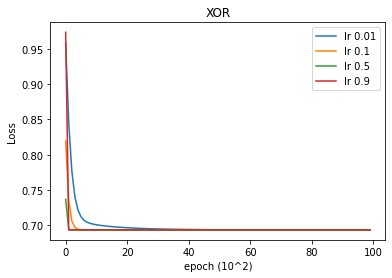

In [77]:
for lr in [0.01, 0.1, 0.5, 0.9]:
    model_xor = logistic_regression_model()
    cost_xor = []
    for epoch in range(10000):
        cost = train(X, Y_xor, model_xor, lr)
        if epoch %100 == 0:
            cost_xor.append(cost)
    plt.plot(cost_xor, label = "lr " + str(lr))
    print('------ learning rate : '+ str(lr) + ' ------')
    print('predicted [0, 0] : ' + str(model_xor.predict(np.array([0, 0]))))
    print('predicted [0, 1] : ' + str(model_xor.predict(np.array([0, 1]))))
    print('predicted [1, 0] : ' + str(model_xor.predict(np.array([1, 0]))))
    print('predicted [1, 1] : ' + str(model_xor.predict(np.array([1, 1]))))
plt.title('XOR')
plt.ylabel('Loss')
plt.xlabel('epoch (10^2)')
plt.legend(loc='upper right')
plt.show()